In [1]:
using ColoringNames
using JLD
using MLLabelUtils
using MLDataPattern
using Plots
using DataFrames

In [10]:
full_param_path = "../models/good/1706031148_sib0.5/params.jld"
full_params = load(full_param_path)
#
#
full_mdl = restore(TermToColorDistributionNetwork, full_param_path, full_params["model_path"])



2017-06-09 07:37:49.048962: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-06-09 07:37:49.049130: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-06-09 07:37:49.049153: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-06-09 07:37:49.049174: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use FMA instructions, but these are available on your machine and could speed up CPU computations.


ColoringNames.TermToColorDistributionNetwork{311,SubString{String},TensorFlow.Tensor{Any}}(MLLabelUtils.LabelEnc.NativeLabels{SubString{String},311}(SubString{String}["acid","green","adobe","algae","almost","black","amber","amethyst","apple","apricot"  …  "vivid","vomit","warm","watermelon","weird","wheat","wine","wintergreen","wisteria","yuck"],Dict("topaz"=>290,"russet"=>255,"berry"=>34,"celery"=>86,"lipstick"=>199,"dull"=>139,"pink"=>21,"chocolate"=>93,"cerise"=>87,"egg"=>138…)),Session(Ptr{Void} @0x00007fc4e4307d30),<Tensor Group:1 shape=unknown dtype=Any>,4,64,128,16)

In [14]:
empirical_params_path = "/mnt_obj/color/models/noml_validation/sib0.5_or64/params_with_model.jld"
empirical_params = load(empirical_params_path)
empiri_mdl = empirical_params["model"];

In [11]:
gr()

Plots.GRBackend()

In [34]:
plt = plot_hsv(query(full_mdl, "light greenish blue")...)

(h_max,s_max,v_max) = (0.453125,0.390625,0.984375)


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 0.00 
 
 
 0.02 
 
 
 0.04 
 
 
 0.06 
 
 
 Hue 
 
 
 Probability 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 0.00 
 
 
 0.01 
 
 
 0.02 
 
 
 0.03 
 
 
 Saturation 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 0.000 
 
 
 0.025 
 
 
 0.050 
 
 
 0.075 
 
 
 0.100 
 
 
 Value

In [62]:
pyplot()

Plots.PyPlotBackend()


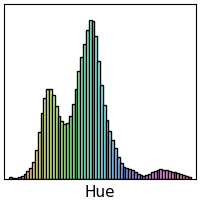


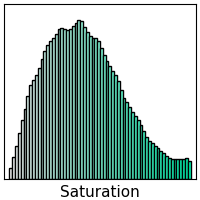


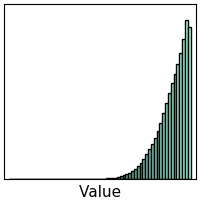

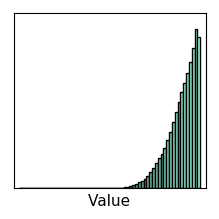

(h_max,s_max,v_max) = (0.453125,0.390625,0.984375)


In [74]:
function plot_3hsv(hp::Vector, sp::Vector, vp::Vector)
    nbins = length(hp)
    @assert nbins == length(sp) == length(vp)
    h_max, s_max, v_max = (indmax.([hp, sp, vp]))/nbins
    @show h_max, s_max, v_max
    h_bar_colors = ColoringNames.hsv2colorant([linspace(0.0,1.0, nbins) s_max*ones(nbins) v_max*ones(nbins)])
    s_bar_colors = ColoringNames.hsv2colorant([h_max*ones(nbins) linspace(0.0,1.0, nbins) v_max*ones(nbins)])
    v_bar_colors = ColoringNames.hsv2colorant([h_max*ones(nbins) s_max*ones(nbins) linspace(0.0,1.0, nbins)])
    
    for (ps,cs,lbl) in zip([hp, sp, vp], [h_bar_colors, s_bar_colors, v_bar_colors], ["Hue", "Saturation", "Value"])
        bar(ps,
            width=1,
            legend = false,
            linewidth=0, 
            seriescolor=cs,
            xlabel=lbl,
            size=(200,200),
            yticks=nothing,
            xticks = nothing,
        grid=false,
        
        ) |> IJulia.display
        
        savefig(joinpath("figs", "netdia", "$(lbl).pdf"))
    end
end
plot_3hsv(query(full_mdl, "light greenish blue")...)

In [72]:
savefig("x.svg")

(h_max,s_max,v_max) = (0.125,0.109375,0.609375)



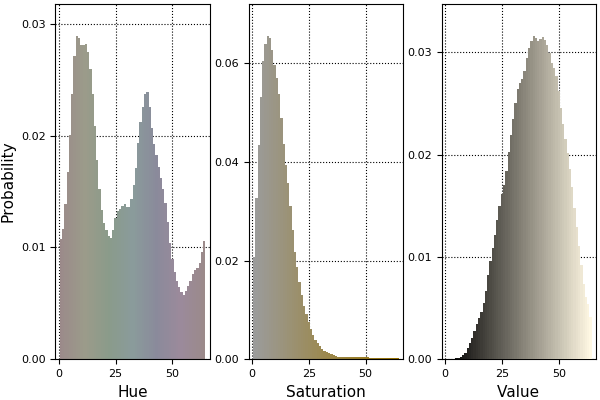

In [92]:
plot_hsv(query(empiri_mdl, "grey")...)

(h_max,s_max,v_max) = (0.125,0.109375,0.625)



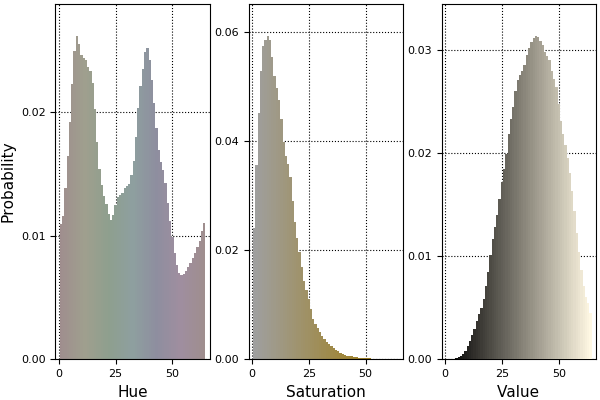

In [91]:
plot_hsv(query(full_mdl, "grey")...)

In [5]:
plot_hsv(query(full_mdl, "wheat")...)

(h_max,s_max,v_max) = (0.140625,0.5625,0.984375)


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 0.00 
 
 
 0.05 
 
 
 0.10 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 0.00 
 
 
 0.01 
 
 
 0.02 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 0.00 
 
 
 0.02 
 
 
 0.04 
 
 
 0.06

In [6]:
plot_hsv(query(empiri_mdl, "wheat")...)

(h_max,s_max,v_max) = (0.140625,0.609375,0.90625)


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 0.00 
 
 
 0.05 
 
 
 0.10 
 
 
 0.15 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 0.00 
 
 
 0.01 
 
 
 0.02 
 
 
 0.03 
 
 
 0.04 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 0.00 
 
 
 0.02 
 
 
 0.04 
 
 
 0.06

In [5]:
param_path = "../models/highdim/extrapolate_sib0.25/pre_eval/params.jld"
params = load(param_path)
#
#
full_mdl = restore(TermToColorDistributionNetwork, param_path)



2017-06-13 07:54:45.540449: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-06-13 07:54:45.541366: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-06-13 07:54:45.541390: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-06-13 07:54:45.541402: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use FMA instructions, but these are available on your machine and could speed up CPU computations.


ColoringNames.TermToColorDistributionNetwork{311,SubString{String},TensorFlow.Tensor{Any}}(MLLabelUtils.LabelEnc.NativeLabels{SubString{String},311}(SubString{String}["acid","green","adobe","algae","almost","black","amber","amethyst","apple","apricot"  …  "vivid","vomit","warm","watermelon","weird","wheat","wine","wintergreen","wisteria","yuck"],Dict("topaz"=>290,"russet"=>255,"berry"=>34,"celery"=>86,"lipstick"=>199,"dull"=>139,"pink"=>21,"chocolate"=>93,"cerise"=>87,"egg"=>138…)),Session(Ptr{Void} @0x00007ff6a4bdaf50),<Tensor Group:1 shape=unknown dtype=Any>,4,64,128,16)

In [9]:
const full_cldata = load_monroe_data(dev_as_train=false, dev_as_test=true)

ColoringNames.ColorDatasets{MLLabelUtils.LabelEnc.NativeLabels{SubString{String},311},ColoringNames.ColorDataset{Array{Any,1},Array{Int64,2},Array{Float32,2}}}(MLLabelUtils.LabelEnc.NativeLabels{SubString{String},311}(SubString{String}["acid","green","adobe","algae","almost","black","amber","amethyst","apple","apricot"  …  "vivid","vomit","warm","watermelon","weird","wheat","wine","wintergreen","wisteria","yuck"],Dict("russet"=>255,"celery"=>86,"lipstick"=>199,"dull"=>139,"chocolate"=>93,"sepia"=>263,"fern"=>152,"sickly"=>267,"y"=>44,"heliotrope"=>173…)),ColoringNames.ColorDataset{Array{Any,1},Array{Int64,2},Array{Float32,2}}(Any["acid green","acid green","acid green","acid green","acid green","acid green","acid green","acid green","acid green","acid green"  …  "yuck","yuck","yuck","yuck","yuck","yuck","yuck","yuck","yuck","yuck"],[1 1 … 311 311; 2 2 … 0 0; 0 0 … 0 0; 0 0 … 0 0],Float32[0.344113 0.855319 0.921569; 0.281905 0.744681 0.921569; … ; 0.376894 0.768559 0.898039; 0.179104 0.4

In [10]:
const g_eval_texts = params["eval_texts"]

100-element Array{Any,1}:
 "light bright green" 
 "pale yellow-green"  
 "violet pink"        
 "light light blue"   
 "very pale blue"     
 "bright yellow green"
 "pale blue-green"    
 "greyish teal"       
 "darkish purple"     
 "pale"               
 "rosy pink"          
 "light greenish blue"
 "greeny grey"        
 ⋮                    
 "pale brown"         
 "red-pink"           
 "brownish orange"    
 "orange-yellow"      
 "pale red"           
 "brown-green"        
 "reddish"            
 "brownish green"     
 "reddish orange"     
 "red-purple"         
 "dark blue-green"    
 "purpley blue"       

In [11]:

const cldata = extrapolation_dataset(full_cldata, g_eval_texts)

ColoringNames.ColorDatasets{MLLabelUtils.LabelEnc.NativeLabels{SubString{String},311},ColoringNames.ColorDataset{SubArray{Any,1,Array{Any,1},Tuple{Array{Int64,1}},false},SubArray{Int64,2,Array{Int64,2},Tuple{Colon,Array{Int64,1}},false},SubArray{Float32,2,Array{Float32,2},Tuple{Array{Int64,1},Colon},false}}}(MLLabelUtils.LabelEnc.NativeLabels{SubString{String},311}(SubString{String}["acid","green","adobe","algae","almost","black","amber","amethyst","apple","apricot"  …  "vivid","vomit","warm","watermelon","weird","wheat","wine","wintergreen","wisteria","yuck"],Dict("russet"=>255,"celery"=>86,"lipstick"=>199,"dull"=>139,"chocolate"=>93,"sepia"=>263,"fern"=>152,"sickly"=>267,"y"=>44,"heliotrope"=>173…)),ColoringNames.ColorDataset{SubArray{Any,1,Array{Any,1},Tuple{Array{Int64,1}},false},SubArray{Int64,2,Array{Int64,2},Tuple{Colon,Array{Int64,1}},false},SubArray{Float32,2,Array{Float32,2},Tuple{Array{Int64,1},Colon},false}}(Any["acid green","acid green","acid green","acid green","acid gree

In [13]:
mdl = full_mdl

ColoringNames.TermToColorDistributionNetwork{311,SubString{String},TensorFlow.Tensor{Any}}(MLLabelUtils.LabelEnc.NativeLabels{SubString{String},311}(SubString{String}["acid","green","adobe","algae","almost","black","amber","amethyst","apple","apricot"  …  "vivid","vomit","warm","watermelon","weird","wheat","wine","wintergreen","wisteria","yuck"],Dict("topaz"=>290,"russet"=>255,"berry"=>34,"celery"=>86,"lipstick"=>199,"dull"=>139,"pink"=>21,"chocolate"=>93,"cerise"=>87,"egg"=>138…)),Session(Ptr{Void} @0x00007ff6a4bdaf50),<Tensor Group:1 shape=unknown dtype=Any>,4,64,128,16)

In [14]:
params["dev_set_results"] = evaluate(mdl, cldata.dev.terms_padded, cldata.dev.colors)

Dict{Symbol,Float64} with 5 entries:
  :perp        => 26.8434
  :mse_to_peak => 0.187655
  :perp_sat    => 42.1984
  :perp_hue    => 15.1596
  :perp_val    => 30.2363

In [33]:
save(JLD.FileIO.File{FileIO.DataFormat{:JLD}}("../models/highdim/extrapolate_sib0.25/params.jld"), params)

In [39]:
en=params["encoding"]

MLLabelUtils.LabelEnc.NativeLabels{SubString{String},311}(SubString{String}["acid","green","adobe","algae","almost","black","amber","amethyst","apple","apricot"  …  "vivid","vomit","warm","watermelon","weird","wheat","wine","wintergreen","wisteria","yuck"],Dict("topaz"=>290,"russet"=>255,"berry"=>34,"celery"=>86,"lipstick"=>199,"dull"=>139,"pink"=>21,"chocolate"=>93,"cerise"=>87,"egg"=>138…))

In [42]:
params["training_costs_o"]

15000-element Array{Float64,1}:
 12.4766 
 12.4715 
 12.4622 
 12.4487 
 12.4295 
 12.4032 
 12.3717 
 12.3326 
 12.2846 
 12.2452 
 12.1952 
 12.1375 
 12.0888 
  ⋮      
 10.0116 
 10.0117 
  9.9871 
 10.0047 
 10.0291 
  9.982  
 10.0297 
  9.95882
 10.022  
  9.98324
  9.99232
 10.0219 